In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from math import radians, cos, sin, asin, sqrt

In [ ]:
# Dataset file locations
datasets_fp = os.getcwd() + "./data"
auxilary_data_fp = datasets_fp  + "/auxiliary-data"
train_fp = datasets_fp + "/train.csv"
test_fp = datasets_fp +"/test.csv"
coe_prices_fp = auxilary_data_fp + "/sg-coe-prices.csv"
existing_mrts_fp = auxilary_data_fp + "/sg-mrt-existing-stations.csv"
planned_mrts_fp = auxilary_data_fp + "/sg-mrt-planned-stations.csv"
primary_schools_fp = auxilary_data_fp + "/sg-primary-schools.csv"
shopping_malls_fp = auxilary_data_fp + "/sg-shopping-malls.csv"
stock_prices_fp = auxilary_data_fp + "/sg-stock-prices.csv"

In [ ]:
# Load Datasets
train_data = pd.read_csv(train_fp)
test_data = pd.read_csv(test_fp)
coe_data = pd.read_csv(coe_prices_fp)
existing_mrts_data = pd.read_csv(existing_mrts_fp)
planned_mrts_data = pd.read_csv(planned_mrts_fp)
primary_schools_data = pd.read_csv(primary_schools_fp)
shopping_malls_data = pd.read_csv(shopping_malls_fp)
stock_prices_data = pd.read_csv(stock_prices_fp)



In [ ]:
test_data.columns

Index(['Id', 'rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'lease_commence_date',
       'latitude', 'longitude', 'elevation', 'subzone', 'planning_area',
       'region'],
      dtype='object')

### Basic Data Cleaning


1.   Check for NAN values
2.   Drop Furnished Column
3.   Drop Elevation Column
4.   Standardize Flat Model to snake case and combine s1 and s2 flat types
5.   Standardize Flat Type
6.   Standardize town
7.   Standardize street name
8.   Standardize subzone
9.   Standardize planning area
10.  Standardize region
11.   Remove duplicate records







##### 1. Check for NAN values

In [ ]:
# Check for nan values - train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [ ]:
# Check for nan values - test
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   30000 non-null  int64  
 1   rent_approval_date   30000 non-null  object 
 2   town                 30000 non-null  object 
 3   block                30000 non-null  object 
 4   street_name          30000 non-null  object 
 5   flat_type            30000 non-null  object 
 6   flat_model           30000 non-null  object 
 7   floor_area_sqm       30000 non-null  float64
 8   furnished            30000 non-null  object 
 9   lease_commence_date  30000 non-null  int64  
 10  latitude             30000 non-null  float64
 11  longitude            30000 non-null  float64
 12  elevation            30000 non-null  int64  
 13  subzone              30000 non-null  object 
 14  planning_area        30000 non-null  object 
 15  region               30000 non-null 

##### 2. Drop Furnished Column

In [ ]:
# All records have only furnished homes both in train and test
# Removing furnished column as it does not add any variation acorss dataset

train_data.furnished.value_counts()
test_data.furnished.value_counts()

yes    30000
Name: furnished, dtype: int64

In [ ]:
train_pdf = train_data.drop(columns=['furnished'])
test_pdf = test_data.drop(columns=['furnished'])

##### 3. Drop Elevation Column

In [ ]:
# All records have only 0.0 elevation both in train and test
# Removing elevation column as it does not add any variation acorss dataset
train_data.elevation.value_counts(), test_data.elevation.value_counts()


(0.0    60000
 Name: elevation, dtype: int64,
 0    30000
 Name: elevation, dtype: int64)

In [ ]:
train_pdf = train_pdf.drop(columns=['elevation'])
test_pdf = test_pdf.drop(columns=['elevation'])

##### 4. Standardise Flat Model

In [ ]:
train_pdf.flat_model.value_counts()

model a                   17122
improved                  17010
new generation            11292
premium apartment          5109
simplified                 2798
standard                   2268
apartment                  2080
maisonette                  956
model a2                    663
dbss                        371
type s1                     108
model a-maisonette           56
adjoined flat                49
type s2                      46
2-room                       34
premium apartment loft       25
premium maisonette            6
terrace                       4
3gen                          3
Name: flat_model, dtype: int64

In [ ]:
#Standardising the data to snake case
train_pdf.flat_model = train_pdf.flat_model.str.lower().str.replace(r'[\s-]', '_', regex= True).str.strip()
test_pdf.flat_model = test_pdf.flat_model.str.lower().str.replace(r'[\s-]', '_', regex= True).str.strip()

In [ ]:
#can we combine premium apartment & loft s1&s2 #will remove
train_pdf['flat_model'] = train_pdf['flat_model'].replace(['type_s1', 'type_s2'], 'type_s1_s2')
test_pdf['flat_model'] = test_pdf['flat_model'].replace(['type_s1', 'type_s2'], 'type_s1_s2')

In [ ]:
train_pdf['flat_model'].value_counts()


model_a                   17122
improved                  17010
new_generation            11292
premium_apartment          5109
simplified                 2798
standard                   2268
apartment                  2080
maisonette                  956
model_a2                    663
dbss                        371
type_s1_s2                  154
model_a_maisonette           56
adjoined_flat                49
2_room                       34
premium_apartment_loft       25
premium_maisonette            6
terrace                       4
3gen                          3
Name: flat_model, dtype: int64

##### 5. Standardise Flat Type

In [ ]:
train_data.flat_type.value_counts()

4-room       12840
3-room       11125
4 room        9049
5-room        8524
3 room        7772
5 room        6235
executive     3528
2-room         617
2 room         310
Name: flat_type, dtype: int64

In [ ]:
train_pdf.flat_type = train_pdf.flat_type.str.lower().str.replace(r'[\s-]', '_', regex= True).str.strip()
test_pdf.flat_type = test_pdf.flat_type.str.lower().str.replace(r'[\s-]', '_', regex= True).str.strip()

In [ ]:
train_pdf.flat_type.value_counts(), test_pdf.flat_type.value_counts()

(4_room       21889
 3_room       18897
 5_room       14759
 executive     3528
 2_room         927
 Name: flat_type, dtype: int64,
 4_room       10878
 3_room        9475
 5_room        7406
 executive     1778
 2_room         463
 Name: flat_type, dtype: int64)

##### 6. Standardize town

In [ ]:
train_pdf.town.value_counts()

jurong west        4413
tampines           4183
sengkang           4003
bedok              3644
ang mo kio         3494
yishun             3378
bukit merah        3160
woodlands          3031
hougang            2859
punggol            2700
toa payoh          2407
clementi           2272
bukit batok        2236
choa chu kang      2117
queenstown         2033
kallang/whampoa    1860
geylang            1716
pasir ris          1712
jurong east        1710
bukit panjang      1607
sembawang          1446
bishan             1437
serangoon          1299
central             615
marine parade       612
bukit timah          56
Name: town, dtype: int64

In [ ]:
train_pdf.town = train_pdf.town.str.title()
test_pdf.town = test_pdf.town.str.title()

In [ ]:
train_pdf.town.value_counts()

Jurong West        4413
Tampines           4183
Sengkang           4003
Bedok              3644
Ang Mo Kio         3494
Yishun             3378
Bukit Merah        3160
Woodlands          3031
Hougang            2859
Punggol            2700
Toa Payoh          2407
Clementi           2272
Bukit Batok        2236
Choa Chu Kang      2117
Queenstown         2033
Kallang/Whampoa    1860
Geylang            1716
Pasir Ris          1712
Jurong East        1710
Bukit Panjang      1607
Sembawang          1446
Bishan             1437
Serangoon          1299
Central             615
Marine Parade       612
Bukit Timah          56
Name: town, dtype: int64

##### 7. Standardize street name

In [ ]:
train_pdf.street_name.value_counts()

ang mo kio avenue 3      480
yishun ring road         473
ang mo kio avenue 10     463
bedok reservoir road     385
Ang Mo Kio Avenue 3      351
                        ... 
Kreta Ayer Road            1
Marine Parade Central      1
seng poh road              1
Jurong West Street 51      1
Zion Road                  1
Name: street_name, Length: 1083, dtype: int64

In [ ]:
train_pdf.street_name = train_pdf.street_name.str.title()
test_pdf.street_name = test_pdf.street_name.str.title()

In [ ]:
train_pdf.street_name.value_counts()

Ang Mo Kio Avenue 3      831
Yishun Ring Road         815
Ang Mo Kio Avenue 10     790
Bedok Reservoir Road     648
Lorong 1 Toa Payoh       534
                        ... 
Sembawang Way              5
Jurong West Street 51      4
Marine Parade Central      3
Clementi Street 11         2
Seng Poh Road              1
Name: street_name, Length: 543, dtype: int64

#####8. Standardize subzone

In [ ]:
train_pdf.subzone = train_pdf.subzone.str.title()
test_pdf.subzone = test_pdf.subzone.str.title()

In [ ]:
train_pdf.subzone.value_counts()

Tampines East          2469
Bedok North            1644
Jurong West Central    1496
Woodlands East         1318
Punggol Field          1203
                       ... 
Bencoolen                12
Moulmein                 11
Kampong Bugis             9
Frankel                   8
Ulu Pandan                8
Name: subzone, Length: 152, dtype: int64

#####9. Standardize planning area

In [ ]:
train_pdf.planning_area = train_pdf.planning_area.str.title()
test_pdf.planning_area = test_pdf.planning_area.str.title()

In [ ]:
train_pdf.planning_area.value_counts()

Jurong West      4413
Tampines         4183
Sengkang         4003
Bedok            3644
Ang Mo Kio       3494
Yishun           3378
Bukit Merah      3160
Woodlands        3031
Hougang          2859
Punggol          2700
Toa Payoh        2407
Clementi         2272
Bukit Batok      2236
Choa Chu Kang    2117
Queenstown       2043
Geylang          1716
Pasir Ris        1712
Jurong East      1710
Bukit Panjang    1607
Sembawang        1446
Bishan           1437
Serangoon        1299
Kallang          1290
Marine Parade     612
Novena            500
Rochor            307
Outram            280
Bukit Timah        78
Downtown Core      66
Name: planning_area, dtype: int64

#####10. Standardize region

In [ ]:
train_pdf.region = train_pdf.region.str.title()
test_pdf.region = test_pdf.region.str.title()

In [ ]:
train_pdf.region.value_counts()

West Region          14355
North-East Region    14355
Central Region       13896
East Region           9539
North Region          7855
Name: region, dtype: int64

#####11. Remove Duplicate Records

In [ ]:
train_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   lease_commence_date  60000 non-null  int64  
 8   latitude             60000 non-null  float64
 9   longitude            60000 non-null  float64
 10  subzone              60000 non-null  object 
 11  planning_area        60000 non-null  object 
 12  region               60000 non-null  object 
 13  monthly_rent         60000 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 6.4+ MB


In [ ]:
# Identify duplicate rows based on all columns
train_duplicates = train_pdf[train_pdf.duplicated()]
# Display the duplicate rows
print(train_duplicates)

      rent_approval_date             town block            street_name  \
801              2021-01         Tampines   157     Tampines Street 12   
2927             2021-11       Ang Mo Kio   602    Ang Mo Kio Avenue 5   
6163             2021-03  Kallang/Whampoa    72          Geylang Bahru   
6250             2023-07       Queenstown    14          Ghim Moh Road   
8139             2021-05         Clementi   374      Clementi Avenue 4   
...                  ...              ...   ...                    ...   
59824            2022-08        Toa Payoh   144     Lorong 2 Toa Payoh   
59870            2021-05      Jurong West  654c  Jurong West Street 61   
59907            2022-04      Bukit Merah   113      Jalan Bukit Merah   
59933            2023-05       Queenstown    87            Dawson Road   
59942            2023-01      Jurong West   480  Jurong West Street 41   

      flat_type         flat_model  floor_area_sqm  lease_commence_date  \
801      3_room     new_generation  

In [ ]:
# Identify duplicate rows based on all columns
test_duplicates = test_pdf[test_pdf.duplicated()]
# Display the duplicate rows
print(test_duplicates)

Empty DataFrame
Columns: [Id, rent_approval_date, town, block, street_name, flat_type, flat_model, floor_area_sqm, lease_commence_date, latitude, longitude, subzone, planning_area, region]
Index: []


In [ ]:
# Remove Duplicate Records, keeping the first occurrence
train_pdf = train_pdf.drop_duplicates(keep='first')
train_pdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59477 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   59477 non-null  object 
 1   town                 59477 non-null  object 
 2   block                59477 non-null  object 
 3   street_name          59477 non-null  object 
 4   flat_type            59477 non-null  object 
 5   flat_model           59477 non-null  object 
 6   floor_area_sqm       59477 non-null  float64
 7   lease_commence_date  59477 non-null  int64  
 8   latitude             59477 non-null  float64
 9   longitude            59477 non-null  float64
 10  subzone              59477 non-null  object 
 11  planning_area        59477 non-null  object 
 12  region               59477 non-null  object 
 13  monthly_rent         59477 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 6.8+ MB


### Basic Feature Engineering



1.   Property Age ( From rent_approval_date and lease_commence_date)
2.   Nearest mrt distance in km
3.   Nearest Planned mrt
4.   Nearest school distance in km
5.   Nearest shopping mall
6.   No. of mrt within 0.5km, mrt within 1km
7.   No. of schools within 1km and 2km
8.   No. of nearest shopping malls within 1km and 2km



#####1. Property Age

In [ ]:
train_pdf['property_age'] = pd.to_datetime(train_pdf['rent_approval_date']).dt.year - pd.to_datetime(train_pdf['lease_commence_date']).dt.year
test_pdf['property_age'] = pd.to_datetime(test_pdf['rent_approval_date']).dt.year - pd.to_datetime(test_pdf['lease_commence_date']).dt.year

In [ ]:
train_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59477 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   59477 non-null  object 
 1   town                 59477 non-null  object 
 2   block                59477 non-null  object 
 3   street_name          59477 non-null  object 
 4   flat_type            59477 non-null  object 
 5   flat_model           59477 non-null  object 
 6   floor_area_sqm       59477 non-null  float64
 7   lease_commence_date  59477 non-null  int64  
 8   latitude             59477 non-null  float64
 9   longitude            59477 non-null  float64
 10  subzone              59477 non-null  object 
 11  planning_area        59477 non-null  object 
 12  region               59477 non-null  object 
 13  monthly_rent         59477 non-null  int64  
 14  property_age         59477 non-null  int64  
dtypes: float64(3), int64(3), object(9)
m

In [ ]:
def get_nearest(df, row):
    lat1 = row.latitude
    lon1 = row.longitude
    lon2 = np.array(df.longitude)
    lat2 = np.array(df.latitude)
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return min(R*c)

In [ ]:
def get_nearest_points_within_distance(df, row, distance_threshold):
    lat1 = row.latitude
    lon1 = row.longitude
    R = 6371  # Earth radius in kilometers
    lon2 = np.array(df.longitude)
    lat2 = np.array(df.latitude)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distances = R*c
    count_within_threshold = np.sum(distances <= distance_threshold)
    return count_within_threshold

#####2. Nearest mrt distance in km

In [ ]:
train_pdf["nearest_mrt_exist"] = train_pdf.apply(lambda x : get_nearest(existing_mrts_data, x), axis = 1)
test_pdf["nearest_mrt_exist"] = test_pdf.apply(lambda x : get_nearest(existing_mrts_data, x), axis = 1)

#####3. Nearest planned mrt distance in km

In [ ]:
train_pdf["nearest_mrt_planned"] = train_pdf.apply(lambda x : get_nearest(planned_mrts_data, x), axis = 1)
test_pdf["nearest_mrt_planned"] = test_pdf.apply(lambda x : get_nearest(planned_mrts_data, x), axis = 1)

#####4. Nearest primary school in km

In [ ]:
train_pdf["nearest_school"] = train_pdf.apply(lambda x : get_nearest(primary_schools_data, x), axis = 1)
test_pdf["nearest_school"] = test_pdf.apply(lambda x : get_nearest(primary_schools_data, x), axis = 1)

#####5. Nearest shopping mall in km

In [ ]:
train_pdf["nearest_mall"] = train_pdf.apply(lambda x : get_nearest(shopping_malls_data, x), axis = 1)
test_pdf["nearest_mall"] = test_pdf.apply(lambda x : get_nearest(shopping_malls_data, x), axis = 1)

#####6. No. of mrt within 0.5km and 1km

In [ ]:
train_pdf["mrt_within_0.5_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(existing_mrts_data, x, 0.5), axis = 1)
test_pdf["mrt_within_0.5_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(existing_mrts_data, x, 0.5), axis = 1)

In [ ]:
train_pdf["mrt_within_1_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(existing_mrts_data, x, 1), axis = 1)
test_pdf["mrt_within_1_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(existing_mrts_data, x, 1), axis = 1)

#####7. No. of schools within 1km, 2km

In [ ]:
train_pdf["school_within_1_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(primary_schools_data, x, 1), axis = 1)
test_pdf["school_within_1_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(primary_schools_data, x, 1), axis = 1)

In [ ]:
train_pdf["school_within_2_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(primary_schools_data, x, 2), axis = 1)
test_pdf["school_within_2_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(primary_schools_data, x, 2), axis = 1)

#####8. No. of malls within 1km, 2km

In [ ]:
train_pdf["malls_within_1_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(shopping_malls_data, x, 1), axis = 1)
test_pdf["malls_within_1_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(shopping_malls_data, x, 1), axis = 1)

In [ ]:
train_pdf["malls_within_2_km"] = train_pdf.apply(lambda x : get_nearest_points_within_distance(shopping_malls_data, x, 2), axis = 1)
test_pdf["malls_within_2_km"] = test_pdf.apply(lambda x : get_nearest_points_within_distance(shopping_malls_data, x, 2), axis = 1)

In [ ]:
train_pdf.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,...,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km
0,2021-09,Jurong East,257,Jurong East Street 24,3_room,new_generation,67.0,1983,1.344518,103.738630,...,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5
1,2022-05,Bedok,119,Bedok North Road,4_room,new_generation,92.0,1978,1.330186,103.938717,...,0.898991,0.904344,0.607716,1.114338,0,1,5,9,0,3
2,2022-10,Toa Payoh,157,Lorong 1 Toa Payoh,3_room,improved,67.0,1971,1.332242,103.845643,...,0.218603,1.183876,0.425760,0.468297,1,4,2,8,3,5
3,2021-08,Pasir Ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,...,1.546040,0.516206,0.564969,0.402359,0,0,3,6,1,3
4,2022-11,Kallang/Whampoa,34,Whampoa West,3_room,improved,68.0,1972,1.320502,103.863341,...,0.187856,2.818105,0.271723,1.073354,1,3,2,4,0,6


### Fundemental Exploratory Data Analysis

#####1. Univariate Analysis

In [ ]:
numerical_columns = ['floor_area_sqm', 'lease_commence_date','monthly_rent']
categorical_columns = ['town', 'region','flat_type', 'flat_model' ]

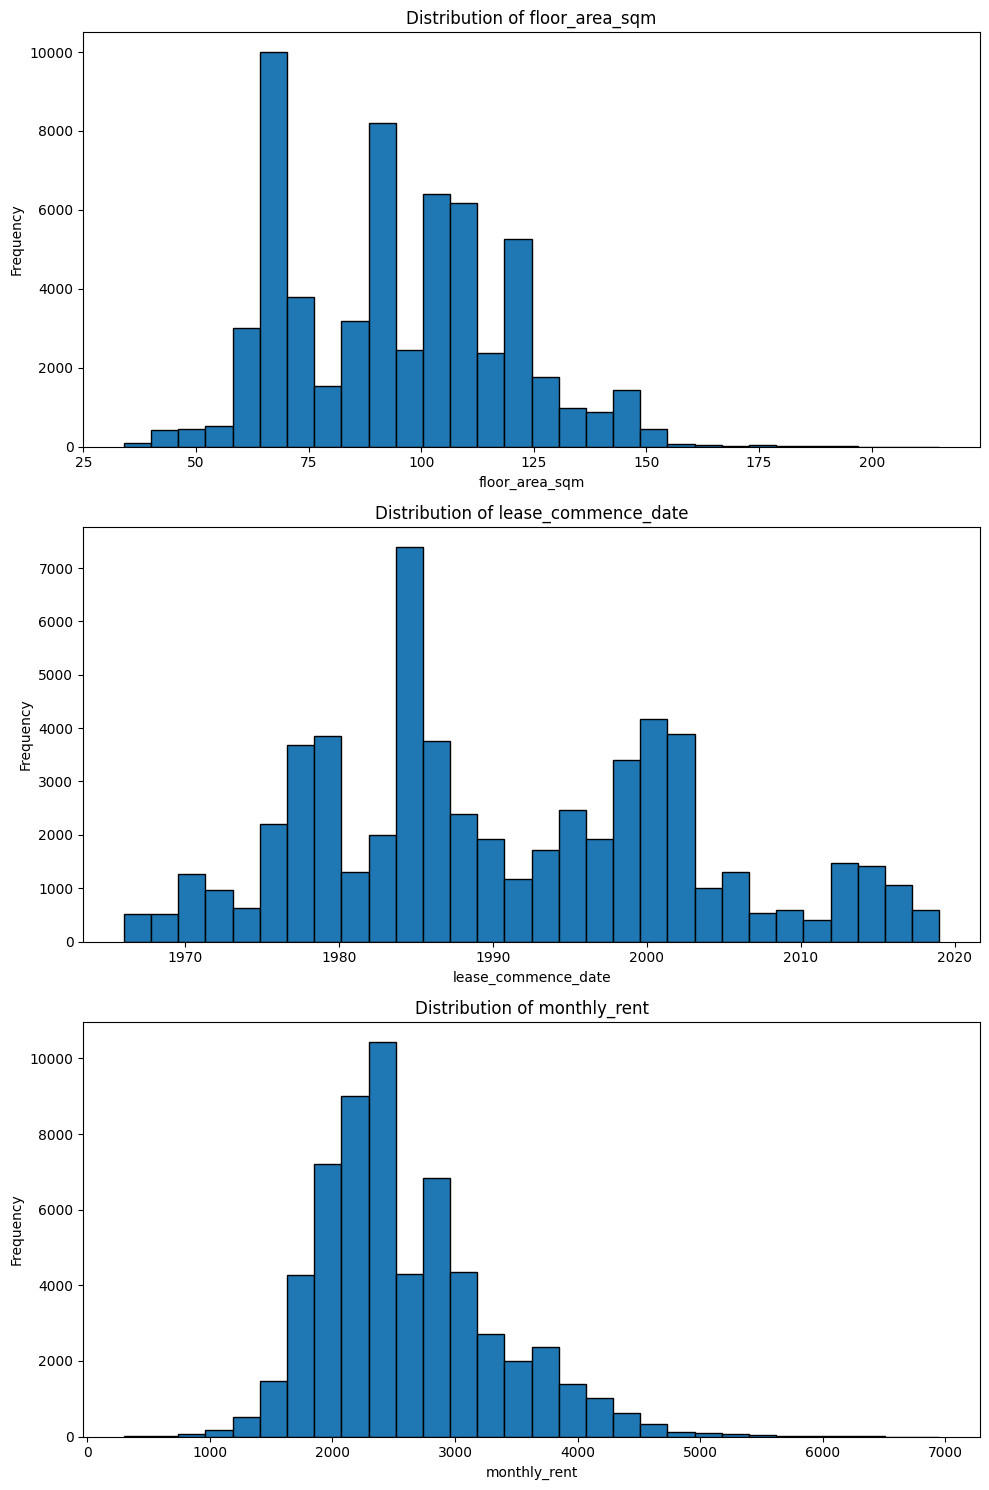

In [ ]:
#Univariate Analysis: ( Numerical)
num_rows = 3
num_cols = 1

fig, axes = plt.subplots(num_rows,num_cols,figsize=(10, 15))
for i, ax in enumerate(axes.flat):
    if i < len(numerical_columns):
        ax.hist(train_pdf[numerical_columns[i]], bins=30, edgecolor='black')
        ax.set_title(f'Distribution of {numerical_columns[i]}')
        ax.set_xlabel(numerical_columns[i])
        ax.set_ylabel('Frequency')

for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

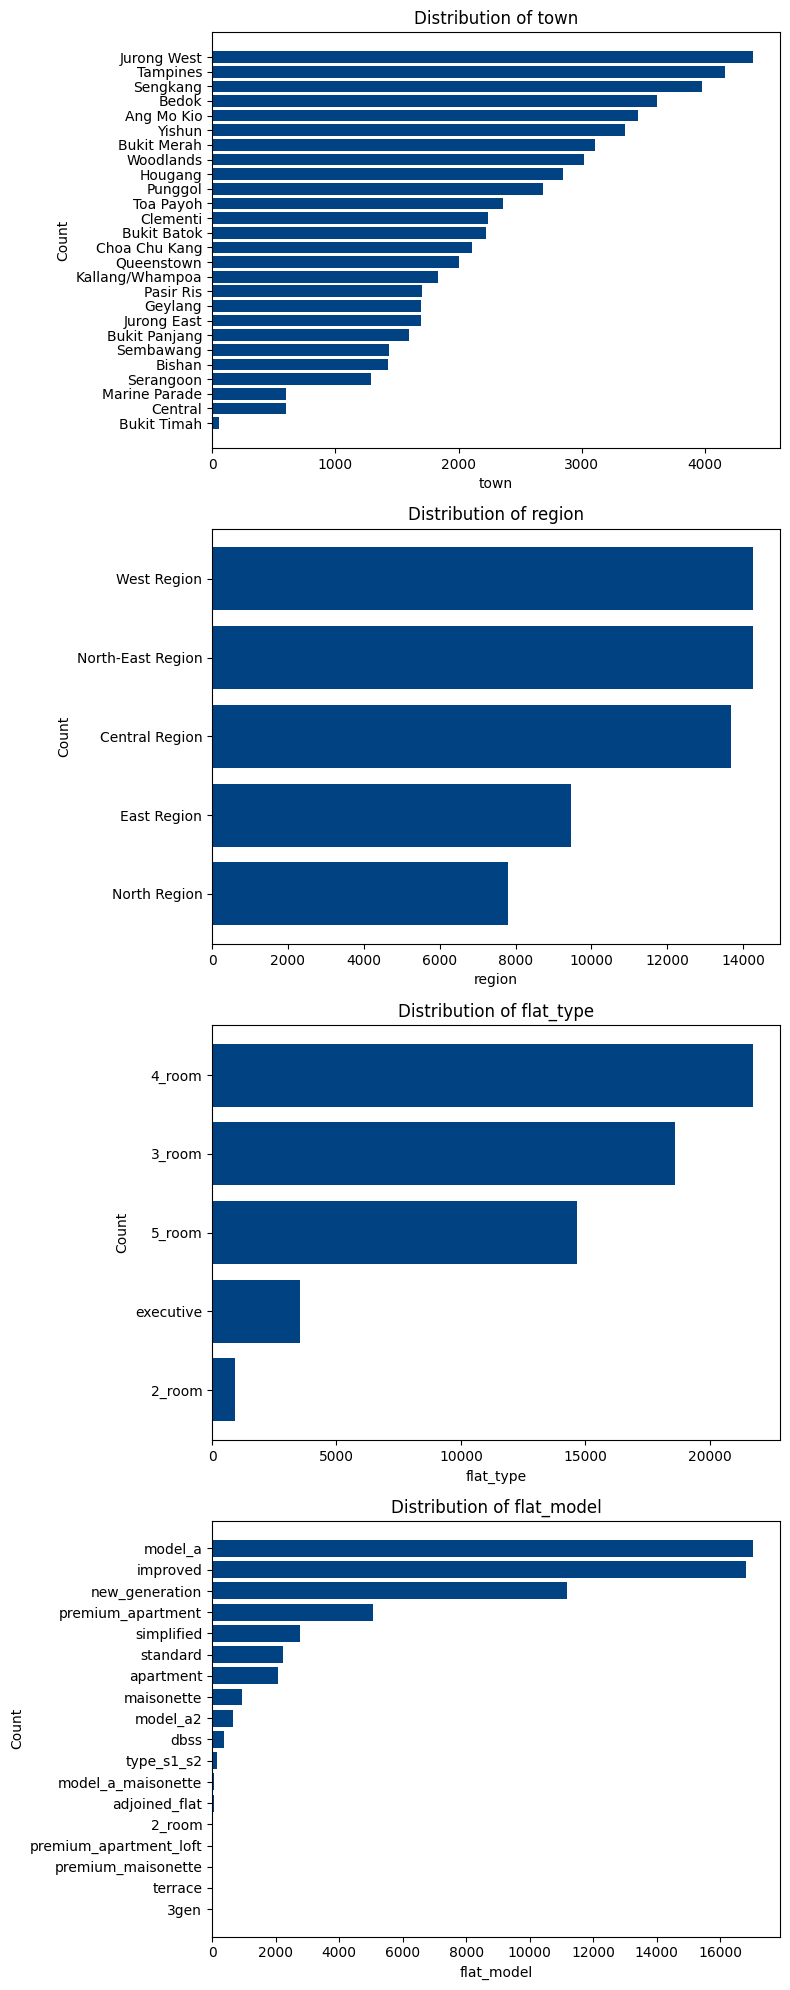

In [ ]:
num_rows = 4
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 20))
for i, ax in enumerate(axes.flat):
    if i < len(categorical_columns):
        row = i // num_cols
        col = i % num_cols
        column = categorical_columns[i]
        value_counts = train_pdf[column].value_counts().sort_values(ascending=True)
        ax.barh(value_counts.index, value_counts.values, color='#004282ff')
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

#####2. Bivariate Analysis

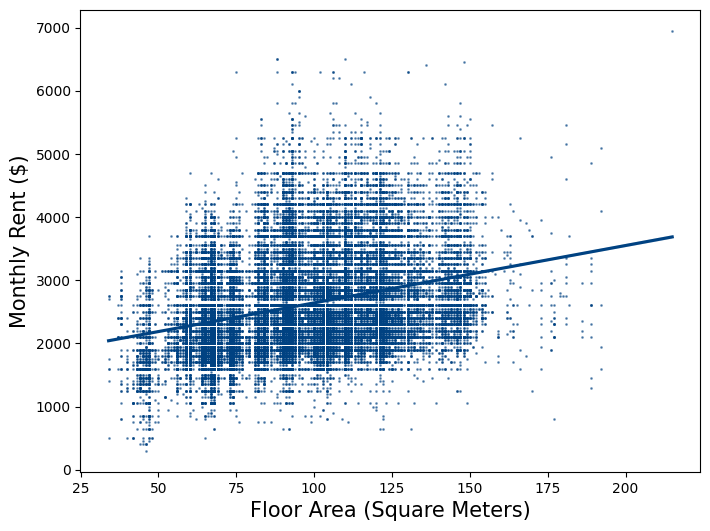

In [ ]:
plt.figure(figsize=(8, 6))
p=sns.regplot(x='floor_area_sqm', y='monthly_rent', data=train_pdf, scatter_kws={"s": 1, 'alpha':0.5},color='#004282ff')
p.set_ylabel('Monthly Rent ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()


From the above graph we can infer Floor area (sqm) is poitively correlated to monthly rent. That is if the house size is bigger then monthly rent is also higher. Depending on the model scaling shall be performed as per necessity

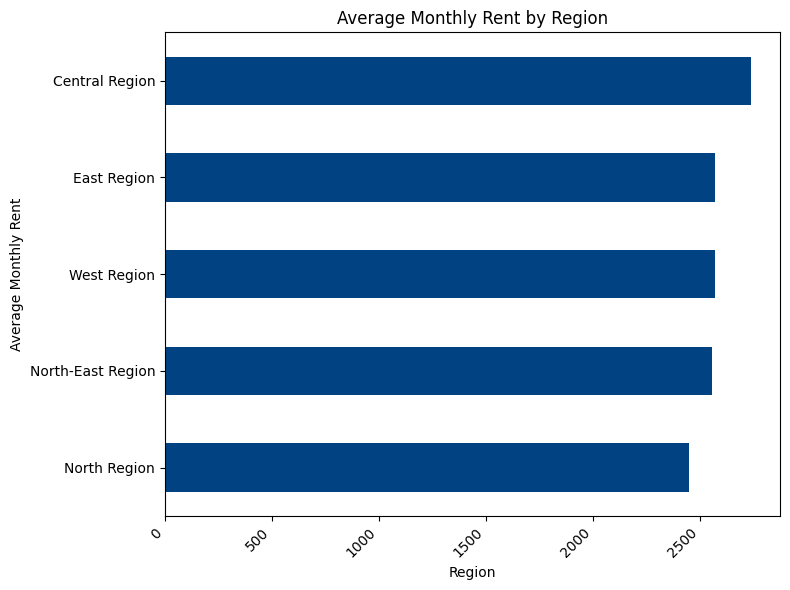

In [ ]:
import matplotlib.pyplot as plt

# Calculate average monthly rent for each town
average_rent_by_town = train_pdf.groupby('region')['monthly_rent'].mean()

# Plotting
plt.figure(figsize=(8, 6))
average_rent_by_town.sort_values().plot(kind='barh', color='#004282ff')
plt.xlabel('Region')
plt.ylabel('Average Monthly Rent')
plt.title('Average Monthly Rent by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Rent is higher in central region, but as there is no fixed order we will be using OHE for region and also to avoid multicollinearity we will drop one column during OHE

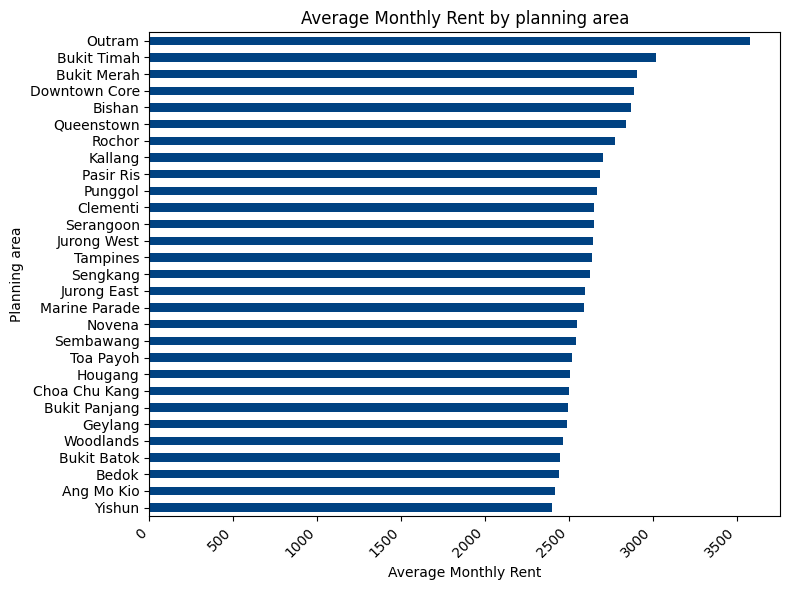

In [ ]:
import matplotlib.pyplot as plt

# Calculate average monthly rent for each town
average_rent_by_town = train_pdf.groupby('planning_area')['monthly_rent'].mean()

# Plotting
plt.figure(figsize=(8, 6))
average_rent_by_town.sort_values().plot(kind='barh', color='#004282ff')
plt.ylabel('Planning area')
plt.xlabel('Average Monthly Rent')
plt.title('Average Monthly Rent by planning area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 There are 29 unique planning areas. The aboce graph shows the rental prices at different planning areas. As the number is quite big performing OHE will lead to curse of dimensionality. To avoid this we will perform target encoding

In [ ]:
medians = train_pdf.groupby('flat_type')['monthly_rent'].median().reset_index()
medians

,flat_type,monthly_rent
0,2_room,1800.0
1,3_room,2100.0
2,4_room,2500.0
3,5_room,2600.0
4,executive,2750.0


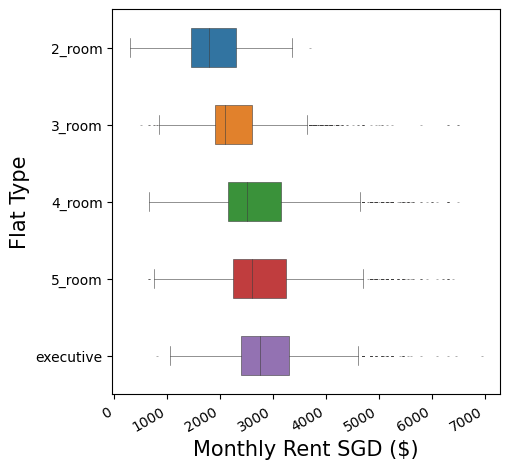

In [ ]:
fig = plt.figure(figsize=(5,5))
p=sns.boxplot(y='flat_type', x='monthly_rent', data=train_pdf, width=0.5, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'),linewidth=0.4 ,
                order=train_pdf.groupby('flat_type')['monthly_rent'].median().sort_values().reset_index()['flat_type'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Monthly Rent SGD ($)', size=15)
p.set_ylabel('Flat Type', size=15)
plt.show()

From this we can infer that the rent depends on the flat_type excutive > 5_room > 4_room >3_room > 2_room. Therefore we will be considering Ordinal Encoding for flat_type feature

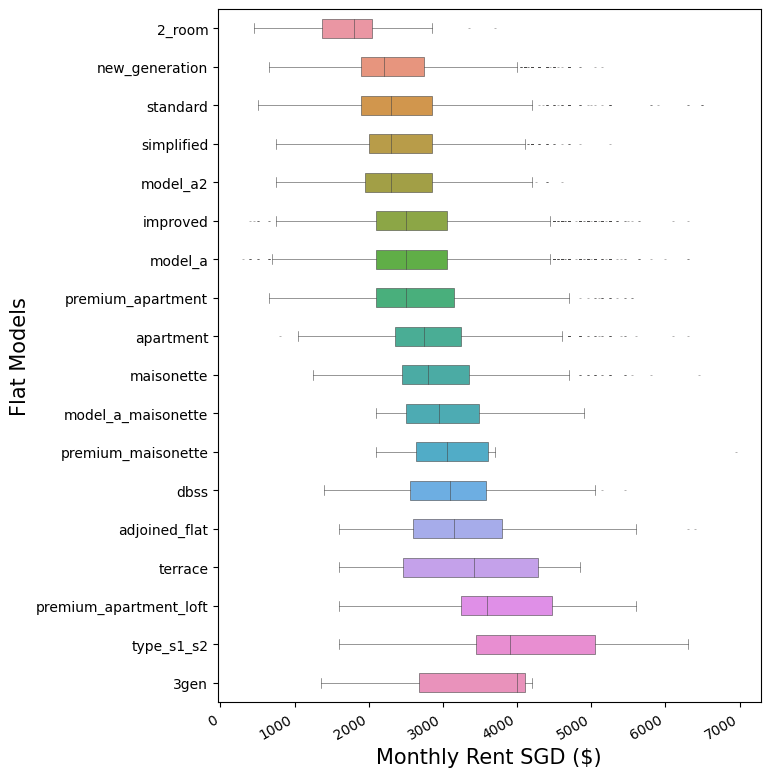

In [ ]:
fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='flat_model', x='monthly_rent', data=train_pdf, width=0.5, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4 ,order=train_pdf.groupby('flat_model')['monthly_rent'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Monthly Rent SGD ($)', size=15)
p.set_ylabel('Flat Models', size=15)
plt.show()

In [ ]:
# Calculate overall median monthly rent for all flat models
overall_median_rent = train_pdf['monthly_rent'].median()

# Calculate lower boundary (1.5 times overall median) and upper boundary (2.5 times overall median)
lower_boundary = 1.5 * overall_median_rent
upper_boundary = 2.5 * overall_median_rent
lower_boundary, upper_boundary

(3600.0, 6000.0)

From the above graph we can see the distribution of rental rates based on flat_models. We can divide the flat_models into 3 categories based on rental rates as low, med and high to perform further analysis ( Target Based Binning ) or perform target encoding

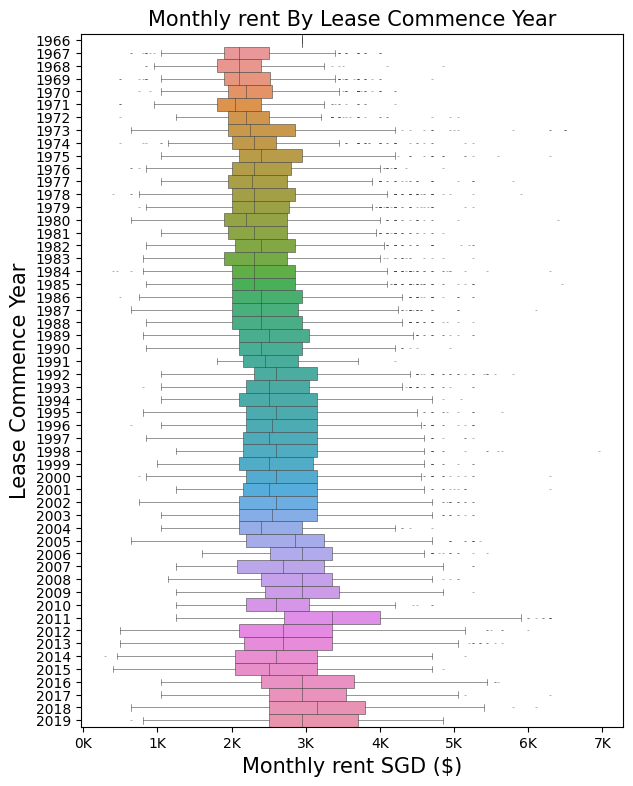

In [ ]:
# Boxplot for each year of lease commence date

fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='monthly_rent', data=train_pdf, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Monthly rent SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Monthly rent By Lease Commence Year', size=15)
plt.show()

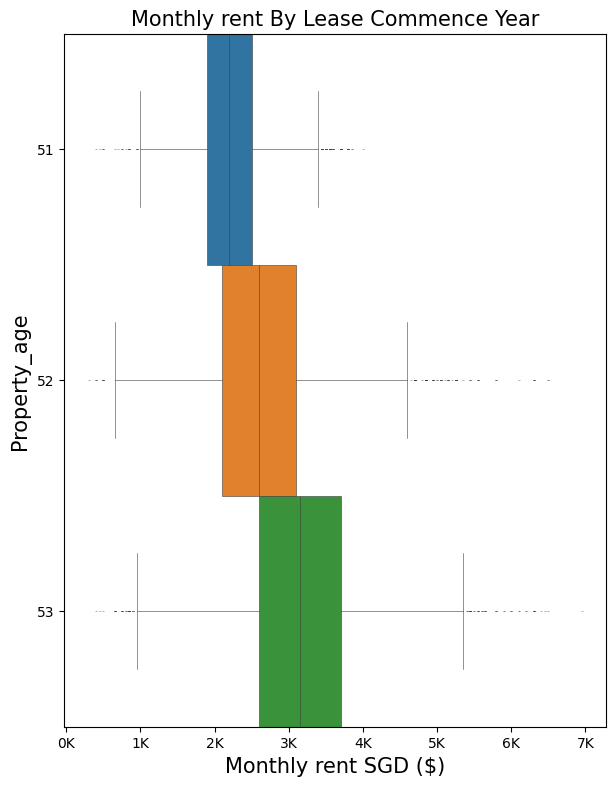

In [ ]:
# Boxplot for each year of lease commence date

fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='property_age', x='monthly_rent', data=train_pdf, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Monthly rent SGD ($)', size=15), p.set_ylabel('Property_age', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Monthly rent By Lease Commence Year', size=15)
plt.show()

From the above graph we can infer that younger the house higher the rental rate, for this instead of date we will be using `property_age` add the time of rental agreement to determine monthly rent

#####3. MultiVariate analysis

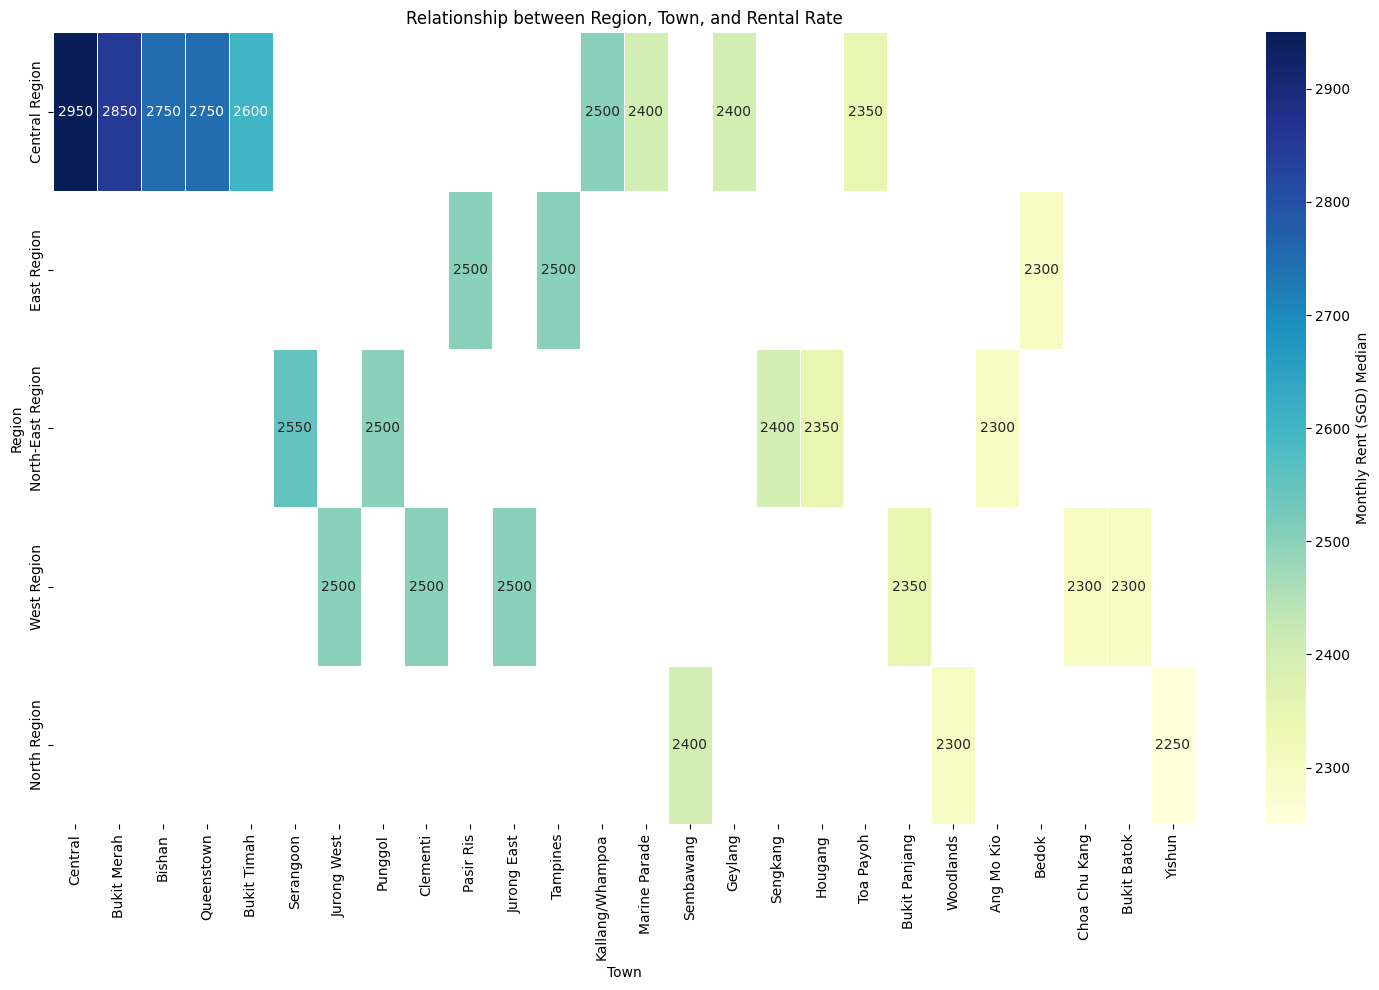

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rows and columns for better visualization
sorted_regions = train_pdf.groupby('region')['monthly_rent'].median().sort_values(ascending=False).index
sorted_towns = train_pdf.groupby('town')['monthly_rent'].median().sort_values(ascending=False).index

# Create a pivot table for region, town, and mean monthly_rent
pivot_table = train_pdf.pivot_table(index='region', columns='town', values='monthly_rent', aggfunc='median')
pivot_table = pivot_table.loc[sorted_regions, sorted_towns]

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap with annotations
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, linewidths=.5, fmt=".0f", cbar_kws={'label': 'Monthly Rent (SGD) Median'})

# Set plot labels and title
plt.xlabel("Town")
plt.ylabel("Region")
plt.title("Relationship between Region, Town, and Rental Rate")

# Increase font size for annotations
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


### Analysing COE with HDB Rental Dataset

In [ ]:
hdb_rental_data = train_pdf

# Ensure both datasets have 'year' and 'month' columns
# Date format is 'YYYY-MM', adjust accordingly
coe_data['date'] = pd.to_datetime(coe_data['year'].astype(str) + '-' + coe_data['month'])
hdb_rental_data['date'] = pd.to_datetime(hdb_rental_data['rent_approval_date'].astype(str))

In [ ]:
coe_data['date'] = pd.to_datetime(coe_data['year'].astype(str) + '-' + coe_data['month'])

In [ ]:
len(coe_data['date'].unique())/len(coe_data)

0.125

In [ ]:
coe_data_grouped = coe_data.groupby("date").agg(mean_coe=("price", np.mean),
    max_coe=('price', np.max),min_coe=("price", np.min)).reset_index()
coe_data_grouped.head()

,date,mean_coe,max_coe,min_coe
0,2021-01-01,45187.375,51900,35900
1,2021-02-01,44871.000,49778,40890
2,2021-03-01,43812.000,47806,37513
3,2021-04-01,50396.750,62100,36134
4,2021-05-01,52199.625,63002,41701


In [ ]:
df_all_dates = hdb_rental_data['date']
df_all_dates = pd.DataFrame(df_all_dates.drop_duplicates(), columns = ["date"])
coe_merged_data = df_all_dates.merge(coe_data_grouped,on = "date" , how = "left")
len(coe_merged_data)/len(df_all_dates)

1.0

In [ ]:
merged_data = pd.merge(hdb_rental_data, coe_merged_data, on='date', how='left')

In [ ]:
merged_data.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'latitude',
       'longitude', 'subzone', 'planning_area', 'region', 'monthly_rent',
       'property_age', 'nearest_mrt_exist', 'nearest_mrt_planned',
       'nearest_school', 'nearest_mall', 'mrt_within_0.5_km',
       'mrt_within_1_km', 'school_within_1_km', 'school_within_2_km',
       'malls_within_1_km', 'malls_within_2_km', 'date', 'mean_coe', 'max_coe',
       'min_coe'],
      dtype='object')

In [ ]:
print(merged_data.isnull().sum())
print(len(merged_data)/len(hdb_rental_data))

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
lease_commence_date    0
latitude               0
longitude              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
property_age           0
nearest_mrt_exist      0
nearest_mrt_planned    0
nearest_school         0
nearest_mall           0
mrt_within_0.5_km      0
mrt_within_1_km        0
school_within_1_km     0
school_within_2_km     0
malls_within_1_km      0
malls_within_2_km      0
date                   0
mean_coe               0
max_coe                0
min_coe                0
dtype: int64
1.0


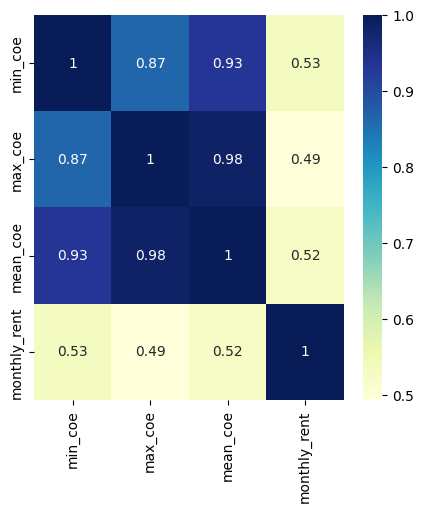

In [ ]:
plt.figure(figsize = (5,5))
df_coe = merged_data[["min_coe", "max_coe", "mean_coe", "monthly_rent"]]
sns.heatmap(df_coe.corr(), annot = True, cmap="YlGnBu")
plt.show()

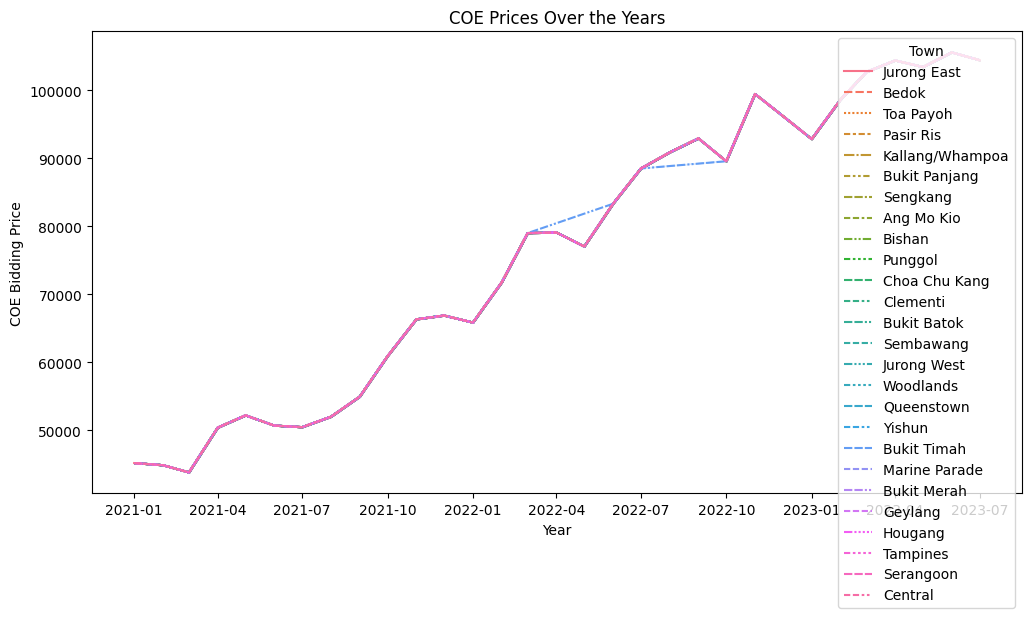

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a time series plot for COE prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='date', y='mean_coe', hue='town', style='town')
plt.title('COE Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('COE Bidding Price')
plt.legend(title='Town')
plt.show()




In [ ]:
merged_data["year"] = merged_data["date"].dt.strftime('%Y')

In [ ]:

# Step 2: Calculate the difference between "Near" and "Far" towns
average_monthly_rent['Difference'] = np.abs(average_monthly_rent['Near'] - average_monthly_rent['Far'])

# Step 3: Get COE prices for each year (replace 'COE_prices' with your actual COE data)
coe_prices_by_year = merged_data.groupby('year')['mean_coe'].mean()

# Step 4: Calculate the correlation between the monthly rent difference and COE prices
correlation, _ = pearsonr(average_monthly_rent['Difference'], coe_prices_by_year)

print("Monthly Rent Difference vs. COE Prices Correlation:", correlation)


Monthly Rent Difference vs. COE Prices Correlation: -0.9944787858596815


In [ ]:
average_monthly_rent['Difference']

year
2021    108.705806
2022     64.973254
2023     48.401265
Name: Difference, dtype: float64

In [ ]:
coe_prices_by_year

year
2021     53063.759776
2022     83846.164352
2023    101906.261887
Name: mean_coe, dtype: float64

From the above we can infer from the strong negative correlation between Monthly Rent Difference (between farther and nearer towns wrt central singapore) and COE Prices. This could explain that as COE increases less and less people can afford to buy a vehicle, this could be one of the determining factors as to why the rental prices at town farther from the central city are lower. Whereas a lower COE implies more people can afford to buy vehicle this would change the way rental rates are decided for places farther from city thus reducing the differnce in rental rates for farther and nearer towns

In [ ]:
coe_merged_data.head()

,date,mean_coe,max_coe,min_coe
0,2021-09-01,54951.625,70002,39000
1,2022-05-01,77035.625,95901,50890
2,2022-10-01,89580.250,110000,65991
3,2021-08-01,51997.375,64901,40010
4,2022-11-01,99472.875,116577,76302


In [ ]:
train_pdf = pd.merge(train_pdf, coe_merged_data, on='date', how='left')
test_pdf['date'] = pd.to_datetime(test_pdf['rent_approval_date'].astype(str))
test_pdf = pd.merge(test_pdf, coe_merged_data, on = 'date' ,how='left')
train_pdf = train_pdf.drop("date", axis =1 )
test_pdf = test_pdf.drop("date", axis =1 )

### Analysing Stock Prices wrt to Rental Dataset

In [ ]:
df_stock = stock_prices_data
df_stock.head()

,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707


In [ ]:
train_pdf.rent_approval_date.unique()

array(['2021-09', '2022-05', '2022-10', '2021-08', '2022-11', '2023-04',
       '2021-01', '2022-06', '2021-10', '2021-04', '2021-03', '2022-02',
       '2021-07', '2022-12', '2023-01', '2022-01', '2023-07', '2021-06',
       '2023-05', '2023-03', '2021-05', '2021-02', '2022-07', '2023-06',
       '2022-03', '2023-02', '2021-12', '2022-04', '2021-11', '2022-08',
       '2022-09'], dtype=object)

In [ ]:
df_stock.name.nunique()

59

In [ ]:
#so we have 59 unique stocks. Calculate the mean, max and min of each stock on a monthly basis
df_stock["year_month"] = df_stock["date"].apply(lambda x : x[0:7])
df_stock.head()

,name,symbol,date,open,high,low,close,adjusted_close,year_month
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833,2021-01
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842,2021-01
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689,2021-01
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473,2021-01
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707,2021-01


In [ ]:
#find max, min, mean rental prices monthly
df_rent = train_pdf.groupby("rent_approval_date").agg(mean_rent=("monthly_rent", np.mean),
    max_rent=('monthly_rent', np.max),min_rent=("monthly_rent", np.min)).reset_index()
df_rent.head()

,rent_approval_date,mean_rent,max_rent,min_rent
0,2021-01,2153.543500,3700,800
1,2021-02,2147.252125,3450,1000
2,2021-03,2168.302277,3450,700
3,2021-04,2183.811475,3600,400
4,2021-05,2215.387988,3700,850


In [ ]:
df_grouped = df_stock.groupby(["name","year_month"]).agg(Mean=("adjusted_close", np.mean),
    max=('high', np.max),min=("low", np.min)).reset_index()

In [ ]:
df_grouped.head()

,name,year_month,Mean,max,min
0,ASLAN Pharmaceuticals,2020-12,9.150000,9.45,9.10
1,ASLAN Pharmaceuticals,2021-01,10.401316,13.00,9.00
2,ASLAN Pharmaceuticals,2021-02,17.276316,27.45,11.15
3,ASLAN Pharmaceuticals,2021-03,19.139130,33.75,14.95
4,ASLAN Pharmaceuticals,2021-04,16.102381,18.55,14.00


In [ ]:
df_final = df_rent.merge(df_grouped, left_on = "rent_approval_date", right_on = "year_month", how = "inner")
print(df_final.shape)
print(df_grouped.shape)


(1709, 9)
(1719, 5)


In [ ]:
df_final = df_final.drop('year_month', axis = 1)


In [ ]:
train_pdf.shape

(59477, 28)

In [ ]:
df_final.head()


,rent_approval_date,mean_rent,max_rent,min_rent,name,Mean,max,min
0,2021-01,2153.5435,3700,800,ASLAN Pharmaceuticals,10.401316,13.000,9.000
1,2021-01,2153.5435,3700,800,Ascendas Reit,2.658000,3.160,2.960
2,2021-01,2153.5435,3700,800,BOC Aviation,59.424900,68.300,60.650
3,2021-01,2153.5435,3700,800,CMON,0.074000,0.074,0.074
4,2021-01,2153.5435,3700,800,CapitaLand Ascott Trust,0.926400,1.140,1.010


In [ ]:
df_final.columns

Index(['rent_approval_date', 'mean_rent', 'max_rent', 'min_rent', 'name',
       'Mean', 'max', 'min'],
      dtype='object')

In [ ]:
col = [ 'mean_rent', 'max_rent', 'min_rent', 'Mean', 'max', 'min']

In [ ]:
list_stocks = df_final.name.unique()

list_stocks

array(['ASLAN Pharmaceuticals', 'Ascendas Reit', 'BOC Aviation', 'CMON',
       'CapitaLand Ascott Trust', 'CapitaLand Mall Trust',
       'City Developments', 'ComfortDelGro', 'DBS Group', 'Flex',
       'Frasers Logistics & Industrial Trust', 'Genting Singapore',
       'Golden Agri-Resources', 'Grab Holdings', 'Great Eastern',
       'Grindrod Shipping', 'HPH Trust (Hutchison Port)', 'IGG Inc',
       'Jardine Cycle & Carriage', 'Kenon Holdings', 'Keppel',
       'Keppel REIT', 'Kulicke and Soffa Industries',
       'Mapletree Commercial Trust', 'Mapletree Industrial Trust',
       'Mapletree Logistics Trust', 'Maxeon Solar Technologies',
       'NetLink Trust', 'OCBC Bank', 'Olam',
       'Pacific Century Regional Developments', 'Riverstone Holdings',
       'SATS', 'ST Engineering', 'Sea (Garena)', 'Seatrium', 'Sembcorp',
       'Singapore Airlines', 'Singapore Exchange', 'Singapore Land',
       'Singapore Post', 'Singtel', 'Suntec REIT', 'Triterras', 'UOB',
       'UOL Group', '

In [ ]:
df_final.columns

Index(['rent_approval_date', 'mean_rent', 'max_rent', 'min_rent', 'name',
       'Mean', 'max', 'min'],
      dtype='object')

In [ ]:
# for stock in list_stocks:
#     df_filtered = df_final[df_final.name == stock][col]
#     plt.figure(figsize = (5,5))
#     sns.heatmap(df_filtered.corr(), annot = True, cmap="YlGnBu")
#     plt.show()

In [ ]:
df_final2 = df_final.groupby("rent_approval_date").mean().reset_index()
df_final2.head()

,rent_approval_date,mean_rent,max_rent,min_rent,Mean,max,min
0,2021-01,2153.543500,3700.0,800.0,12.585338,14.739780,11.920820
1,2021-02,2147.252125,3450.0,1000.0,13.856507,16.418120,12.894460
2,2021-03,2168.302277,3450.0,700.0,13.250911,16.250480,12.501900
3,2021-04,2183.811475,3600.0,400.0,14.152774,16.571078,13.891529
4,2021-05,2215.387988,3700.0,850.0,13.545685,15.668549,12.971824


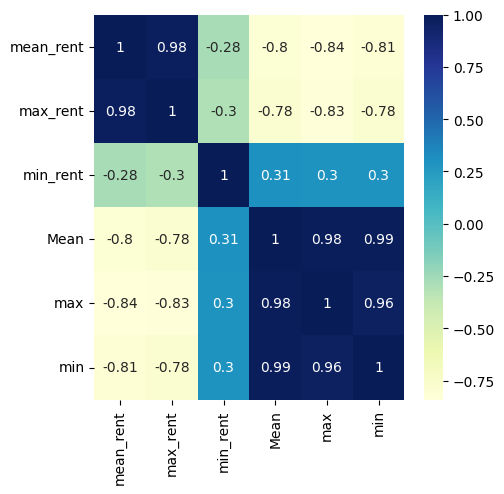

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df_final2.corr(), annot = True, cmap="YlGnBu")
plt.show()

here we see that average rent has a very high correlation with average max, mean values of rent for that month. but we when predicting the actual value, we wont have the values for current month. So let's check the correlation with the previous month.

In [ ]:
df_final2.head()

,rent_approval_date,mean_rent,max_rent,min_rent,Mean,max,min
0,2021-01,2153.543500,3700.0,800.0,12.585338,14.739780,11.920820
1,2021-02,2147.252125,3450.0,1000.0,13.856507,16.418120,12.894460
2,2021-03,2168.302277,3450.0,700.0,13.250911,16.250480,12.501900
3,2021-04,2183.811475,3600.0,400.0,14.152774,16.571078,13.891529
4,2021-05,2215.387988,3700.0,850.0,13.545685,15.668549,12.971824


In [ ]:
df_final2[["last_month_mean", "last_month_max", "last_month_min"]] = df_final2[["Mean", "max", "min"]].shift(1)
df_final2.head()

,rent_approval_date,mean_rent,max_rent,min_rent,Mean,max,min,last_month_mean,last_month_max,last_month_min
0,2021-01,2153.543500,3700.0,800.0,12.585338,14.739780,11.920820,NaN,NaN,NaN
1,2021-02,2147.252125,3450.0,1000.0,13.856507,16.418120,12.894460,12.585338,14.739780,11.920820
2,2021-03,2168.302277,3450.0,700.0,13.250911,16.250480,12.501900,13.856507,16.418120,12.894460
3,2021-04,2183.811475,3600.0,400.0,14.152774,16.571078,13.891529,13.250911,16.250480,12.501900
4,2021-05,2215.387988,3700.0,850.0,13.545685,15.668549,12.971824,14.152774,16.571078,13.891529


In [ ]:
df_final2.columns

Index(['rent_approval_date', 'mean_rent', 'max_rent', 'min_rent', 'Mean',
       'max', 'min', 'last_month_mean', 'last_month_max', 'last_month_min'],
      dtype='object')

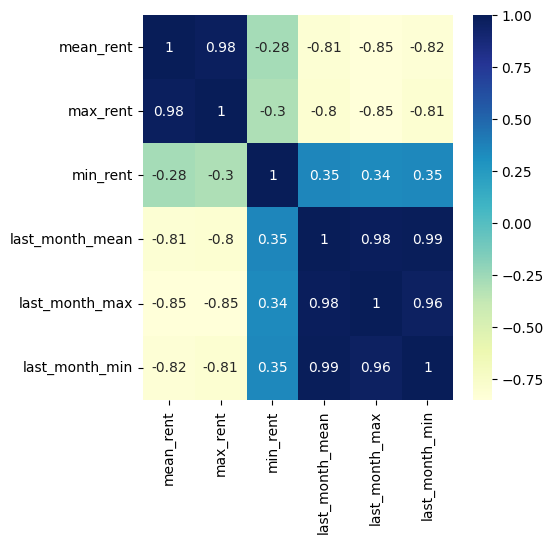

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df_final2[['rent_approval_date', 'mean_rent', 'max_rent', 'min_rent','last_month_mean', 'last_month_max', 'last_month_min']].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Mean rent also has a high correlation with last months stock values.

In [ ]:
df_final2.tail()

,rent_approval_date,mean_rent,max_rent,min_rent,Mean,max,min,last_month_mean,last_month_max,last_month_min
26,2023-03,3080.014361,6450.0,500.0,9.428695,10.583241,8.677241,9.839854,11.127649,9.214509
27,2023-04,3177.719033,6500.0,400.0,9.802183,10.984085,9.122898,9.428695,10.583241,8.677241
28,2023-05,3188.162635,6950.0,650.0,9.477422,11.539305,8.544492,9.802183,10.984085,9.122898
29,2023-06,3215.860634,6300.0,650.0,9.350660,10.057627,8.732712,9.477422,11.539305,8.544492
30,2023-07,3259.703704,6100.0,750.0,9.394464,10.133169,8.857542,9.350660,10.057627,8.732712


In [ ]:
# we have the data till 2023 july.
#lets check how the date ranges in test data
test_data.rent_approval_date.unique()

array(['2023-01', '2022-09', '2023-07', '2021-08', '2022-03', '2022-01',
       '2021-05', '2022-08', '2021-12', '2021-06', '2023-04', '2022-06',
       '2022-05', '2021-02', '2021-10', '2022-10', '2021-03', '2022-11',
       '2021-11', '2023-06', '2021-07', '2023-03', '2022-07', '2021-01',
       '2022-12', '2023-02', '2022-02', '2023-05', '2021-09', '2021-04',
       '2022-04'], dtype=object)

Since all the dates are less than or equal to 2023-07, we are good to use the stock prices data
Now lets see the correlation in actual train data, with the aggregation
we will see the correlation with last month's max, min and mean of stock prices. For the first month, we take the actual value rather than cpmparing with last month, cause that information isnt availale

In [ ]:
len(df_final2.last_month_mean)

31

In [ ]:
df_final2["last_month_mean"].fillna(df_final2.Mean, inplace = True)
df_final2["last_month_max"].fillna(df_final2["max"], inplace = True)
df_final2["last_month_min"].fillna(df_final2["min"], inplace = True)
df_final2.head()

,rent_approval_date,mean_rent,max_rent,min_rent,Mean,max,min,last_month_mean,last_month_max,last_month_min
0,2021-01,2153.543500,3700.0,800.0,12.585338,14.739780,11.920820,12.585338,14.739780,11.920820
1,2021-02,2147.252125,3450.0,1000.0,13.856507,16.418120,12.894460,12.585338,14.739780,11.920820
2,2021-03,2168.302277,3450.0,700.0,13.250911,16.250480,12.501900,13.856507,16.418120,12.894460
3,2021-04,2183.811475,3600.0,400.0,14.152774,16.571078,13.891529,13.250911,16.250480,12.501900
4,2021-05,2215.387988,3700.0,850.0,13.545685,15.668549,12.971824,14.152774,16.571078,13.891529


In [ ]:
df_final2.columns

Index(['rent_approval_date', 'mean_rent', 'max_rent', 'min_rent', 'Mean',
       'max', 'min', 'last_month_mean', 'last_month_max', 'last_month_min'],
      dtype='object')

In [ ]:
df_stock_final = df_final2[['rent_approval_date', 'last_month_mean', 'last_month_max', 'last_month_min']]

In [ ]:
train_pdf.shape

(59477, 28)

In [ ]:
train_pdf.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,...,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe
0,2021-09,Jurong East,257,Jurong East Street 24,3_room,new_generation,67.0,1983,1.344518,103.738630,...,1.202674,0,1,3,7,0,5,54951.625,70002,39000
1,2022-05,Bedok,119,Bedok North Road,4_room,new_generation,92.0,1978,1.330186,103.938717,...,1.114338,0,1,5,9,0,3,77035.625,95901,50890
2,2022-10,Toa Payoh,157,Lorong 1 Toa Payoh,3_room,improved,67.0,1971,1.332242,103.845643,...,0.468297,1,4,2,8,3,5,89580.250,110000,65991
3,2021-08,Pasir Ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,...,0.402359,0,0,3,6,1,3,51997.375,64901,40010
4,2022-11,Kallang/Whampoa,34,Whampoa West,3_room,improved,68.0,1972,1.320502,103.863341,...,1.073354,1,3,2,4,0,6,99472.875,116577,76302


In [ ]:
train_pdf_stock = train_pdf.merge(df_stock_final, on = "rent_approval_date", how = "inner")
print(train_pdf_stock.shape)
print(train_pdf.shape)

(59477, 31)
(59477, 28)


In [ ]:
test_pdf_stock = test_pdf.merge(df_stock_final, on = "rent_approval_date", how = "inner")
print(test_pdf_stock.shape)
print(test_pdf.shape)

(30000, 31)
(30000, 28)


In [ ]:
pd.options.display.max_columns = None

In [ ]:
train_pdf_stock.to_csv(datasets_fp + "/train_pdf_stock.csv", index = False)
test_pdf_stock.to_csv(datasets_fp + "/test_pdf_stock.csv", index = False)

### Data Transformations + additional feature engineering ( discussion ) . Further encoding is carried out in superset file



1.   `flat_type` - Ordinal
2.   `location` - `planning area` retained and `town` drop town ( explanation given in report)
3.    `region` - One Hot encoding
4.    `flat_model` - One Hot Encoding
5.    `floor_area_sqm` - scaling ( depends on ML algo)
6.    `property_age` - scaling ( depends on ML algo)
7.    `latitude` - dropped
8.    `longitude` - dropped




In [ ]:
train_pdf_stock = pd.read_csv(datasets_fp + "/train_pdf_stock.csv")
test_pdf_stock = pd.read_csv(datasets_fp + "/test_pdf_stock.csv")

In [ ]:
train_pdf_stock.columns

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'latitude',
       'longitude', 'subzone', 'planning_area', 'region', 'monthly_rent',
       'property_age', 'nearest_mrt_exist', 'nearest_mrt_planned',
       'nearest_school', 'nearest_mall', 'mrt_within_0.5_km',
       'mrt_within_1_km', 'school_within_1_km', 'school_within_2_km',
       'malls_within_1_km', 'malls_within_2_km', 'mean_coe', 'max_coe',
       'min_coe', 'last_month_mean', 'last_month_max', 'last_month_min'],
      dtype='object')

In [ ]:
test_pdf_stock.columns

Index(['Id', 'rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'latitude',
       'longitude', 'subzone', 'planning_area', 'region', 'property_age',
       'nearest_mrt_exist', 'nearest_mrt_planned', 'nearest_school',
       'nearest_mall', 'mrt_within_0.5_km', 'mrt_within_1_km',
       'school_within_1_km', 'school_within_2_km', 'malls_within_1_km',
       'malls_within_2_km', 'mean_coe', 'max_coe', 'min_coe',
       'last_month_mean', 'last_month_max', 'last_month_min'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
train_pdf_stock.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,planning_area,region,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min
0,2021-09,Jurong East,257,Jurong East Street 24,3_room,new_generation,67.0,1983,1.344518,103.738630,Yuhua East,Jurong East,West Region,1600,51,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5,54951.625,70002,39000,14.986571,17.36298,14.337745
1,2021-09,Punggol,203a,Punggol Field,4_room,model_a,85.0,2004,1.398524,103.903863,Matilda,Punggol,North-East Region,2400,51,0.683672,0.766322,0.476015,0.704576,0,1,6,17,2,6,54951.625,70002,39000,14.986571,17.36298,14.337745
2,2021-09,Choa Chu Kang,458,Choa Chu Kang Avenue 4,executive,premium_apartment,142.0,2000,1.378101,103.736002,Peng Siang,Choa Chu Kang,West Region,1800,51,1.231832,1.208124,0.213468,0.936378,0,0,2,3,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745
3,2021-09,Sembawang,340a,Sembawang Close,5_room,premium_apartment,110.0,2001,1.447534,103.817892,Sembawang Central,Sembawang,North Region,2100,51,0.299914,8.571923,0.444347,0.189552,1,1,5,8,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745
4,2021-09,Bishan,117,Bishan Street 12,5_room,improved,121.0,1987,1.347017,103.849987,Bishan East,Bishan,Central Region,2750,51,0.445013,2.188344,0.618813,0.402451,2,3,2,10,2,4,54951.625,70002,39000,14.986571,17.36298,14.337745


<Axes: xlabel='monthly_rent', ylabel='Density'>

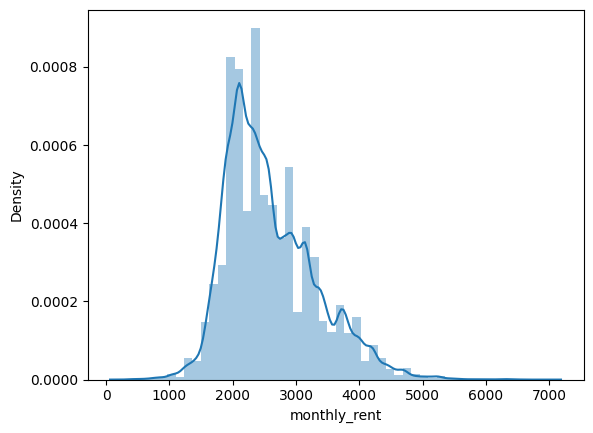

In [ ]:
sns.distplot(train_pdf_stock.monthly_rent) ( Seen in error analysis skeweness towards right)

In [ ]:
train_pdf_stock['block'] = train_pdf_stock['block'].str.replace('[a-zA-Z]', '', regex=True)
test_pdf_stock['block'] = test_pdf_stock['block'].str.replace('[a-zA-Z]', '', regex=True)


In [ ]:
set(train_pdf_stock.street_name.unique().tolist() + test_pdf_stock.street_name.unique().tolist()) - set(train_pdf_stock.street_name.unique().tolist()) #extra in test so we cannot use it

set(train_pdf_stock.block.unique().tolist() + test_pdf_stock.block.unique().tolist()) - set(train_pdf_stock.block.unique().tolist())

set()

The ’block’ column initially contained a vast num-
ber of unique values. To mitigate this, we removed the
alpha part of the values, resulting in around 980 unique
values. Given that this is huge we rule out using One hot
encoding (OHE). Despite this reduction, on checking the
average number of records per unique ’block’ value was
approximately 60, indicating extremely low variability
in a dataset of almost 60,000 records. Considering that
block ranges can again vary from town to town, the
actual variability is even lower. Given these factors, it was
rational to drop the ’block’ column from further analysis.

In [ ]:
len(train_pdf_stock)/train_pdf_stock.block.nunique()


60.690816326530616

In [ ]:
set(train_pdf_stock.subzone.unique().tolist() + test_pdf_stock.subzone.unique().tolist()) - set(train_pdf_stock.subzone.unique().tolist())
#check to see if there are extra values in the test set that are not present in train for consistency

set()

In [ ]:
len(train_pdf_stock)/train_pdf_stock.subzone.nunique() #target encoding

391.29605263157896

We calculated the average number of records
per unique ’subzone’ value in the dataset, resulting in an
average frequency of 391.30. This high average suggests
that ’subzone’ could be a suitable candidate for target
encoding. A higher average number indicates stable en-
coding, enhancing the model’s predictive power. Given
the large number of values in the subzone and a good
representation of the dataset, we used target encoding for
the subzone

In [ ]:
len(train_pdf_stock)/train_pdf_stock.planning_area.nunique() #target encoding

2050.9310344827586

After analyzing both the ’town’
and ’planning area’ columns, it’s evident that there are
26 unique values in ’town’ and 29 unique values in
’planning area’. Out of these, 24 values are common
between them. The dissimilar values from ’town’ are
’Central’, ’Kallang/Whampoa’, and from ’planning area’
are ’Novena’, ’Downtown Core’, ’Rochor’, ’Outram’,
’Kallang’.
Considering the domain knowledge, Novena, Downtown
Core, and Rochor are smaller regions within the central
town, and Kallang belongs to the Kallang/Whampoa
town. Recognizing the inherent order between these two
columns and the absence of extra planning areas in the
test set not present in the training set, we opt to drop
the ’town’ column and solely use ’planning area’ for our
analysis. Given that there are nearly 29 values we choose
to target encode this column.

In [ ]:
set(train_pdf_stock.planning_area.unique().tolist() + test_pdf_stock.planning_area.unique().tolist()) - set(train_pdf_stock.planning_area.unique().tolist()) #check to see if there are extra values in the test set that are not present in train for consistency

set()

In [ ]:
train_pdf_stock.region.unique() #ohe

array(['West Region', 'North-East Region', 'North Region',
       'Central Region', 'East Region'], dtype=object)